In [3]:
#importing the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#converting the json file and loading data
import pandas as pd
import json

def load_data(fp):
  with open(fp) as fid:
    series = (pd.Series(json.loads(s)) for s in fid)
    return pd.concat(series,axis=1).T

renththerunway_fp = "drive/My Drive/ML Project/renttherunway_final_data.json"
df = load_data(renththerunway_fp)
df.head()




,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


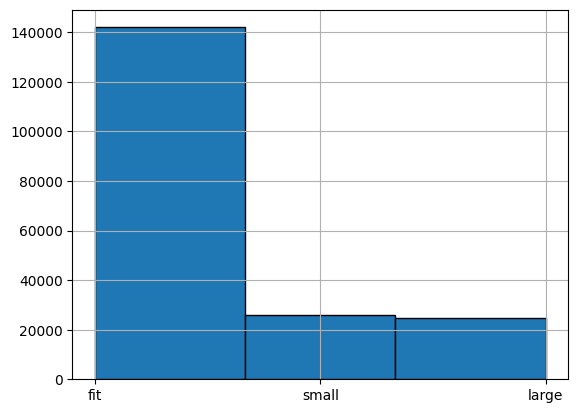

In [5]:
target_feature = 'fit'
n_classes = df[target_feature].unique().shape[0]
df[target_feature].hist(bins=n_classes, edgecolor='black');

#Target variable has more observation of 'fit' class than the others. The dataset is unbalanced.

In [6]:
def check_nulls(data):
    for col in df:
        print(f'Column \'{col}\'. Is null - {data[col].isnull().sum()}')
      

to_drop = df[df['fit'] == 'fit'].isnull().any(axis=1)
n = to_drop.sum()
to_drop.shape, df.shape
df = df.drop(df[df['fit'] == 'fit'][to_drop].index, axis=0)
print(f'Dropped {n} examples')

check_nulls(df)

#Checking null values and dropping them.

Dropped 34325 examples
Column 'fit'. Is null - 0
Column 'user_id'. Is null - 0
Column 'bust size'. Is null - 4740
Column 'item_id'. Is null - 0
Column 'weight'. Is null - 7658
Column 'rating'. Is null - 19
Column 'rented for'. Is null - 1
Column 'review_text'. Is null - 0
Column 'body type'. Is null - 3734
Column 'review_summary'. Is null - 0
Column 'category'. Is null - 0
Column 'height'. Is null - 191
Column 'size'. Is null - 0
Column 'age'. Is null - 254
Column 'review_date'. Is null - 0


In [7]:
#converting height from feet to inches  
def parse_ht(height):
    ht_ = height.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_
#converting weight from pounds to kgs
def pounds_to_kilos(s):
    return int(s.replace('lbs', '')) * 0.45359237

df['height'] = (df['height']
                        .fillna("0' 0\"")
                        .apply(parse_ht))
df['height'][df['height'] == 0] = df['height'].median()

df['weight'] = (df['weight']
                        .fillna('0lbs')
                        .apply(pounds_to_kilos))
df['weight'][df['weight'] == 0.0] = df['weight'].median()

df['user_id'] = pd.to_numeric(df['user_id'])
df['bust size'] = df['bust size'].fillna(df['bust size'].value_counts().index[0])
df['body type'] = df['body type'].fillna(df['body type'].value_counts().index[0])
df['item_id'] = pd.to_numeric(df['item_id'])
df['size'] = pd.to_numeric(df['size'])

df['age'] = pd.to_numeric(df['age'])
df['age'] = df['age'].fillna(df['age'].median())

df['rating'] = pd.to_numeric(df['rating'])
df['rating'] = df['rating'].fillna(df['rating'].median())

df['review_date'] = pd.to_datetime(df['review_date'], format='%B %d, %Y')
df.info()

# Replacing null values with median values and converting the data types integer types

<ipython-input-7-1f458357d0c3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'][df['height'] == 0] = df['height'].median()
<ipython-input-7-1f458357d0c3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'][df['weight'] == 0.0] = df['weight'].median()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 158219 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fit             158219 non-null  object        
 1   user_id         158219 non-null  int64         
 2   bust size       158219 non-null  object        
 3   item_id         158219 non-null  int64         
 4   weight          158219 non-null  float64       
 5   rating          158219 non-null  float64       
 6   rented for      158218 non-null  object        
 7   review_text     158219 non-null  object        
 8   body type       158219 non-null  object        
 9   review_summary  158219 non-null  object        
 10  category        158219 non-null  object        
 11  height          158219 non-null  float64       
 12  size            158219 non-null  int64         
 13  age             158219 non-null  float64       
 14  review_date     158219 non-null  dat

In [8]:
#column mapper
col_mapper = {
    'bust size': 'bust_size',
    'weight': 'usr_weight_kg',
    'rating': 'review_rating',
    'rented for': 'rented_for',
    'body type': 'body_type',
    'category': 'product_category',
    'height': 'usr_height_inchs',
    'size': 'product_size',
    'age': 'usr_age',
}
df.rename(col_mapper, axis=1, inplace=True)


In [9]:
newdf = df.copy()

In [10]:
#bust size and category mapper
import re

def parse_bust_size(s):
    m = re.match(r'(\d+)([A-Za-z])(\+?)', s)
    if m:
        return pd.Series(data=[int(m.group(1)), m.group(2).lower()])
    return []

mapper = {
    0: 'bust_size_num', 
    1: 'bust_size_cat'
}

temp_df = newdf['bust_size'].apply(parse_bust_size).rename(mapper, axis=1)
temp_df['bust_size_num'] = pd.to_numeric(temp_df['bust_size_num'])
newdf = newdf.join(temp_df)
newdf.drop(['bust_size'], axis=1, inplace=True)

In [11]:
#bust category mapper
mapper = {
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4,
    'e': 5,
    'f': 6,
    'g': 7,
    'h': 8,
    'i': 9,
    'j': 10,
}
newdf['bust_size_cat'] = newdf['bust_size_cat'].map(mapper)

newdf.head()

,fit,user_id,item_id,usr_weight_kg,review_rating,rented_for,review_text,body_type,review_summary,product_category,usr_height_inchs,product_size,usr_age,review_date,bust_size_num,bust_size_cat
0,fit,420272,2260466,62.142155,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,2016-04-20,34,4
1,fit,273551,153475,59.874193,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,2013-06-18,34,2
3,fit,909926,126335,61.234970,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,2014-02-12,34,3
4,fit,151944,616682,65.770894,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,2016-09-26,34,2
5,fit,734848,364092,62.595747,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,2016-04-30,32,2


In [12]:
#target feature mapper
mapper = {
    'small': -1,
    'fit': 0,
    'large': 1,
}
newdf['fit'] = newdf['fit'].map(mapper)

In [13]:
#Removing unnecessary features from the dataframe
numeric_dtypes = {'int64', 'float64'}
numeric_features = [c for c in newdf.columns if str(newdf[c].dtype) in numeric_dtypes]
numeric_features.remove('user_id')
numeric_features.remove('item_id')
numeric_features.remove('review_rating')

In [14]:
#developing new feature BMI from height and weight.
import numpy as np
newdf['BMI'] = newdf['usr_weight_kg'] / np.power(newdf['usr_height_inchs'], 2)
newdf.drop(['usr_weight_kg', 'usr_height_inchs'], axis=1, inplace=True)

In [15]:
#Adding BMI into dataframe and removing height and weight.
numeric_features.append('BMI')
numeric_features.remove('usr_weight_kg')
numeric_features.remove('usr_height_inchs')

In [16]:
#One hot encoding for discrete features
rented_for_col = newdf['rented_for'].replace('party: cocktail', 'other')
rented_for_col_encoded = pd.get_dummies(rented_for_col)
rented_for_col_encoded.head()

,date,everyday,formal affair,other,party,vacation,wedding,work
0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0


In [17]:
#One hot encoding for discrete features
body_type_col = newdf['body_type']
body_type_col_encoded = pd.get_dummies(body_type_col)
body_type_col_encoded.head()

,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0


In [18]:
counts = newdf['product_category'].value_counts()

In [19]:
newdf['product_category'].nunique()
threshold = 1000

In [20]:
repl = counts[counts <= threshold].index

In [21]:
top_n = 8
#One hot encoding for discrete features
prod_cats = newdf['product_category'].value_counts().index[:top_n].values
prod_cat_col = newdf['product_category'].apply(lambda x: x if x in prod_cats else 'other')
prod_cat_col_encoded = pd.get_dummies(newdf['product_category'].replace(repl, 'uncommon'))
prod_cat_col_encoded.sample(5)


,dress,gown,jacket,jumpsuit,maxi,mini,romper,sheath,shift,skirt,top,uncommon
127495,0,1,0,0,0,0,0,0,0,0,0,0
23563,1,0,0,0,0,0,0,0,0,0,0,0
123021,1,0,0,0,0,0,0,0,0,0,0,0
24106,1,0,0,0,0,0,0,0,0,0,0,0
37016,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
#making a dataframe consisting of encoded discrete features.
dummy_features_df = pd.concat((prod_cat_col_encoded, rented_for_col_encoded, body_type_col_encoded), axis=1)
dummy_features_df.head()


,dress,gown,jacket,jumpsuit,maxi,mini,romper,sheath,shift,skirt,...,vacation,wedding,work,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
from sklearn.feature_selection import VarianceThreshold

# removing all features having in 80% samples either ones or zeros
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
print(dummy_features_df.shape)
dummy_features = sel.fit_transform(dummy_features_df)
print(dummy_features.shape)

(158219, 27)
(158219, 6)


In [24]:
#combining numeric features and discrete features.
import os


data = pd.concat((newdf[numeric_features], dummy_features_df), axis=1)

head, tail = os.path.split(renththerunway_fp)
cleaned_data_fp = 'cleaned_' + tail.replace('json', 'csv')

data.to_csv(cleaned_data_fp, index=False)
data.head(3)

,fit,product_size,usr_age,bust_size_num,bust_size_cat,BMI,dress,gown,jacket,jumpsuit,...,vacation,wedding,work,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
0,0,14,28.0,34,4,0.013439,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,12,36.0,34,2,0.013745,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,8,34.0,34,3,0.014493,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
#dropping two columns from dataframe.
from sklearn.model_selection import train_test_split
X = np.hstack((newdf[numeric_features].drop([target_feature,'bust_size_num', 'bust_size_cat'], axis=1), dummy_features))
y = newdf["fit"].astype('float32').values
X.shape, y.shape

((158219, 9), (158219,))

In [27]:
#oversampling the data using SMOTENC 
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [28]:
from collections import Counter
print("Resampled dataset shape:", Counter(y_resampled))

Resampled dataset shape: Counter({0.0: 107733, -1.0: 107733, 1.0: 107733})


In [29]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
#using k-NN for calculating train and test scores by varying k.
from sklearn.neighbors import KNeighborsClassifier
test_scores_pre = []
train_scores_pre = []
for i in range(2,20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)    
    train_scores_pre.append(knn.score(X_train,y_train))
    test_scores_pre.append(knn.score(X_test,y_test))
max_test_score = max(test_scores_pre)
test_scores_ind = [i for i, v in enumerate(test_scores_pre) if v == max_test_score]
print('Max test score before hyperparamter tuning {:.2f} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score before hyperparamter tuning 72.38 % and k = [2]


Text(0, 0.5, 'Prediction Accuracy')

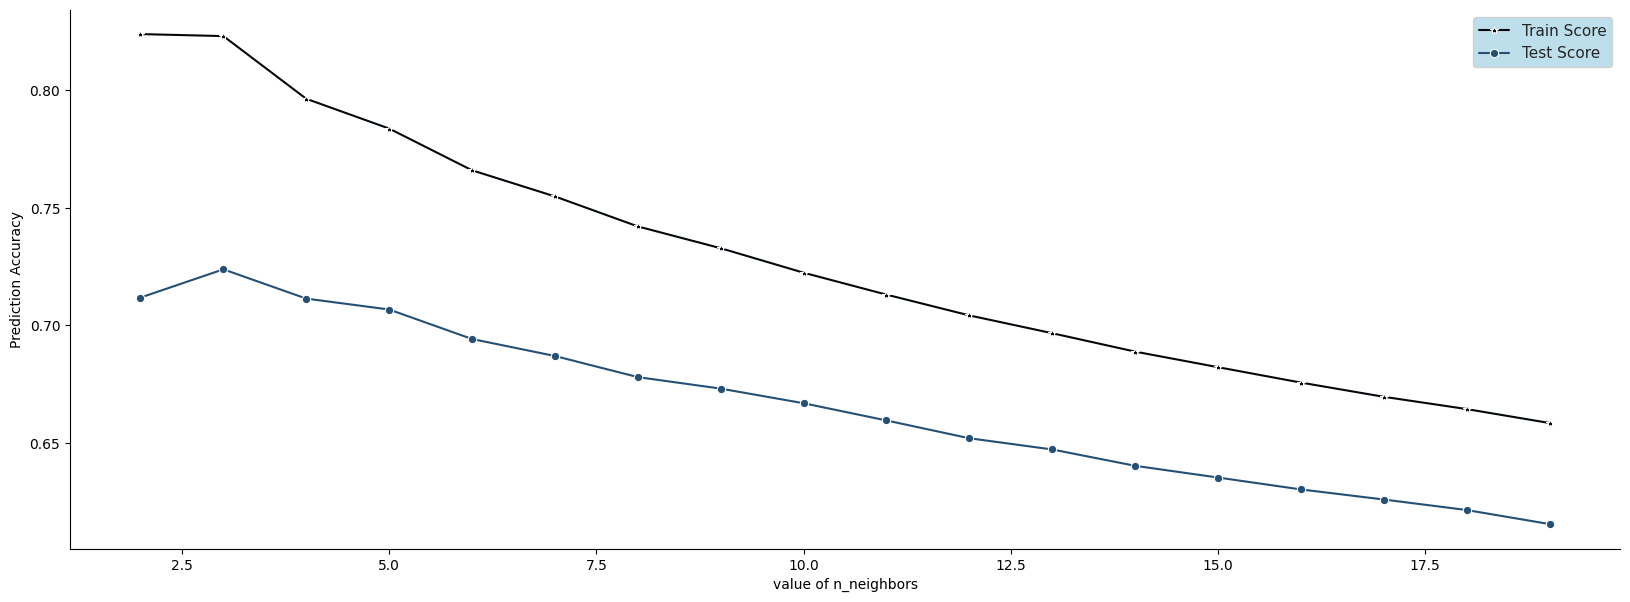

In [33]:
#plotting a graph for train and test scores for different values of k and finding which value of K will be the best.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.title('')
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
sns.despine()
p = sns.lineplot(x=range(2,20),y=train_scores_pre,marker='*',label='Train Score',color='#03080c')
p = sns.lineplot(x=range(2,20),y=test_scores_pre,marker='o',label='Test Score', color= '#255075')

plt.xlabel('value of n_neighbors')
plt.ylabel('Prediction Accuracy')

Text(0.5, 19.049999999999997, 'Predicted label')

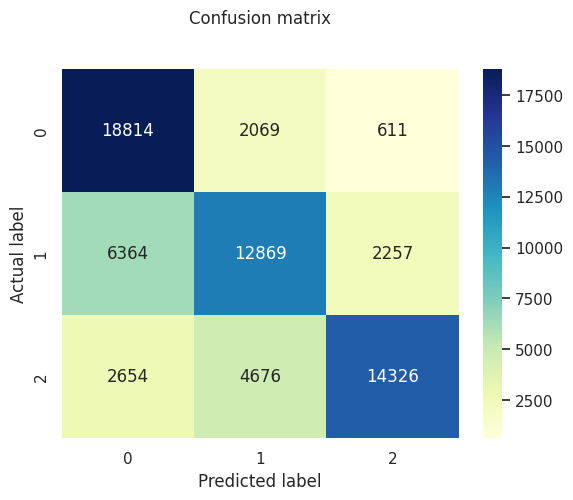

In [34]:
#As k=2 has highest test score we run the model for k=2.
knn=KNeighborsClassifier(2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.68      0.88      0.76     21494
         0.0       0.66      0.60      0.63     21490
         1.0       0.83      0.66      0.74     21656

    accuracy                           0.71     64640
   macro avg       0.72      0.71      0.71     64640
weighted avg       0.72      0.71      0.71     64640



In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
from sklearn.metrics import accuracy_score

rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

Text(0.5, 19.049999999999997, 'Predicted label')

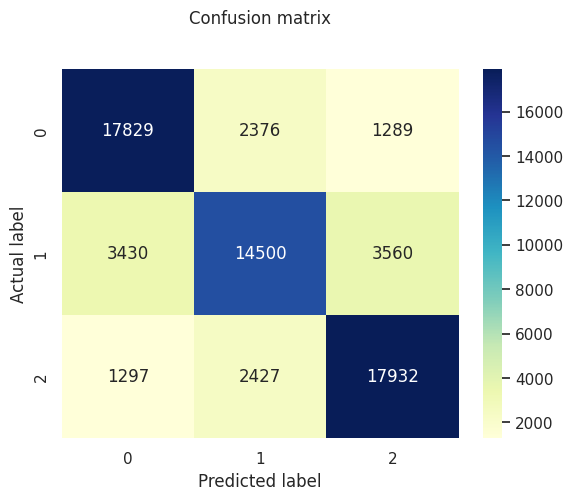

In [37]:
y_pred = rfc.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.79      0.83      0.81     21494
         0.0       0.75      0.67      0.71     21490
         1.0       0.79      0.83      0.81     21656

    accuracy                           0.78     64640
   macro avg       0.78      0.78      0.78     64640
weighted avg       0.78      0.78      0.78     64640



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Generate some random data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a random forest classifier
#rfc = RandomForestClassifier()

# Create a grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)


grid_results = grid_search.fit(X_train, y_train)
final_model = rfc.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(classification_report(y_test,y_pred))
print(grid_results.best_params_)

Best hyperparameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.89      0.97      0.93        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [40]:
test_scores = []
train_scores = []
for i in range(2,20):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)    
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]



Text(0, 0.5, 'Prediction Accuracy')

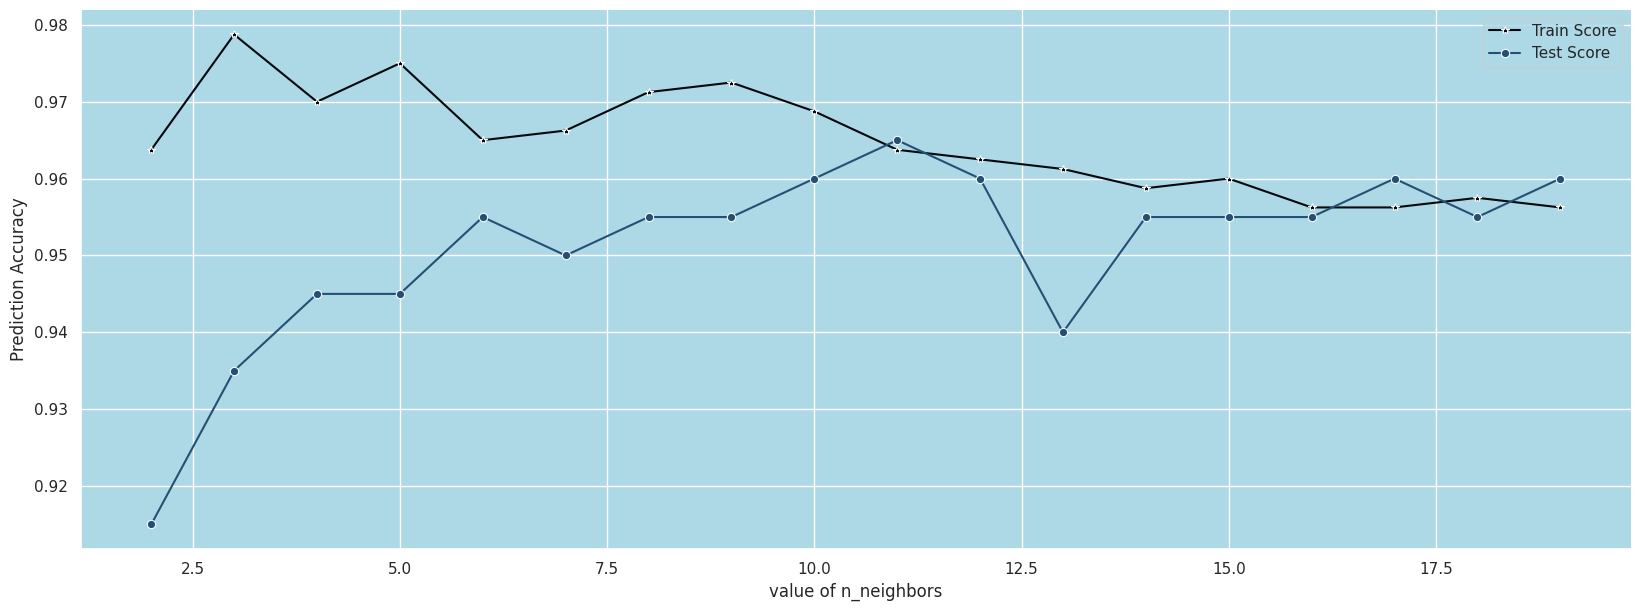

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.title('')
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
sns.despine()
p = sns.lineplot(x=range(2,20),y=train_scores,marker='*',label='Train Score',color='#03080c')
p = sns.lineplot(x=range(2,20),y=test_scores,marker='o',label='Test Score', color= '#255075')

plt.xlabel('value of n_neighbors')
plt.ylabel('Prediction Accuracy')

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# define the parameter grid to search
param_grid = {'n_neighbors': list(range(2,20)), 'weights': ['uniform', 'distance']}

# instantiate the KNeighborsClassifier model
knn = KNeighborsClassifier()

# perform grid search using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters and corresponding score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation score: 0.96


In [43]:
grid_results = grid_search.fit(X_train, y_train)
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(classification_report(y_test,y_pred))
print(grid_results.best_params_)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       104
           1       0.92      0.96      0.94        96

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

{'n_neighbors': 6, 'weights': 'distance'}
